# Chapter 4: orthogonal polynomial methods for differential equations

In this chapter we discuss
1. General orthogonal polynomials (OPs), Chebyshev OPs and ultraspherical OPs
2. Jacobi, multiplication, conversion and differentiation matrices of Chebyshev and ultraspherical OPs and how they can be used to solve differential equations efficiently

In the previous chapter, we learnt that interpolants expressed in terms of Chebyshev polynomials can be very useful for approximating non-periodic functions.  We learnt that there are fast algorithms for computing Chebyshev interpolants and their derivatives and these can be used to approximate solutions to PDEs.

Chebyshev polynomials are examples of *orthogonal polynomials* (OPs).  In this chapter we'll learn that OPs can be used to design *sparse* methods for differential equations.

OPs are fundamental for computational mathematics, with applications in function approximation, quadrature (calculating integrals), solving differential equations, spectral analysis of Schrödinger operators, etc.  In addition, OPs play a very important role in many mathematical areas
including representation theory, functional analysis, integrable systems, singular integral equations,
complex analysis, and random matrix theory.

**Note:** In previous chapters, a polynomial $p_n(x)$ denoted an interpolating polynomial through $n$ distinct nodes and $p_n$ had degree $\leq n-1$.  In this chapter, unless stated otherwise, $p_n(x)$ denotes a polynomial of degree precisely $n$, i.e., 
$$
p_n(x) = k_n x^n + \mathcal{O}(x^{n-1})
$$
where $k_n \neq 0$.

The set of polynomials of degree $\leq n$ with real coefficients, $\mathbb{P}_n$, is a linear space (or vector space) of dimension $n+1$.  The set of  monomials of degree $\leq n$, $\lbrace 1, x, x^2, \ldots, x^n \rbrace$, is a basis for the space $\mathbb{P}_n$, meaning that all polynomials of degree $\leq n$ can be expressed as linear combinations of monomials.  Likewise, $\lbrace p_0(x), p_1(x), \ldots, p_n(x) \rbrace$ is a basis of $\mathbb{P}_n$.  It is much  more efficient and stable to perform computations in OP bases as oposed to the monomial basis.

## Definition of orthogonal polynomials

Let $p_0(x),p_1(x),p_2(x),…$ be a sequence of polynomials such that $p_n(x)$ is exactly of degree $n$, i.e., $p_n(x) = k_n x^n + \mathcal{O}(x^{n-1})$
where $k_n \neq 0$ .  Let $w(x)$ be a continuous weight function on a (possibly infinite) interval $(a,b)$: that is $w(x) \geq 0$ for all $a < x < b$.
This induces an inner product
$$
\langle f,g \rangle := \int_a^b f(x) g(x) w(x) {\rm d}x
$$

We say that $\{p_0, p_1,\ldots\}$ are _orthogonal with respect to the weight $w$_ if
$$
\langle p_n,p_m \rangle = 0\qquad \text{ for }\: n \neq m.
$$
Because $w$ is continuous, we have
$$
\| p_n \|^2 = \langle p_n,p_n \rangle > 0 .
$$

Orthogonal polymomials are not unique: we can multiply each $p_n$ by a different nonzero constant $\tilde p_n(x) = c_n p_n(x)$, and
$\tilde p_n$ will be orthogonal w.r.t. $w$.  However, if we specify $k_n$, this is sufficient to uniquely define them:

**Proposition (Uniqueness of OPs)** Given a non-zero $k_n$, there is a unique polynomial $p_n$ orthogonal w.r.t. $w$
to all lower degree polynomials.

**Proof** Suppose $r_n(x) = k_n x^n + O(x^{n-1})$ is another  OP w.r.t. $w$. We want to show $p_n - r_n$ is zero.
But this is a polynomial of degree $<n$, hence
$$
p_n(x) - r_n(x) = \sum_{k=0}^{n-1} c_k p_k(x)
$$
But we have for $j \leq n-1$
$$
\langle p_j,p_j \rangle c_j = \langle p_n - r_n, p_j \rangle = \langle p_n,p_j \rangle - \langle r_n, p_j\rangle = 0 - 0 = 0
$$
which shows all $c_j$ are zero.  Note that we used the linearity property of the inner product: for constants $\alpha$, $\beta$ and functions $f(x)$, $g(x)$ and $h(x)$, it follows that $\langle  f,\alpha g + \beta h\rangle = \alpha\langle f, g\rangle + \beta\langle f, h \rangle $.  $\blacksquare$

**Corollary** If $q_n$ and $p_n$ are orthogonal w.r.t. $w$ to all lower degree polynomials,
then $q_n(x) = C p_n(x)$ for some constant $C$.

**Example and Proposition (Chebyshev polynomials of the first kind are OPs)** The Chebyshev polynomials of the first kind,
$$
T_n(x) = \cos n\,{\rm acos}\, x,
$$
are OPs on $x \in [-1, 1]$ with respect to the weight
$$
w(x) = \frac{1}{\sqrt{1 - x^2}},
$$
and
$$
k_0 = 1, \qquad k_n = 2^{n-1}, \qquad n \geq 1.
$$

**Proof**  It follows immediately from the definition that $T_0(x) = 1$, $T_{1}(x) = x$ and for $n \geq 1$, setting $x = \cos \theta$,
$$
x T_n(x) = \cos θ \cos n θ = {\cos(n-1)θ + \cos(n+1)θ \over 2} = {T_{n-1}(x) + T_{n+1}(x) \over 2}
$$
In other words $T_{n+1}(x) = 2x T_n(x) - T_{n-1}(x)$ for $n \geq 1$. This shows that $T_n(x) = k_nx^{n} + \mathcal{O}(x^{n-1})$ with $k_0 = 1$ and $k_n = 2^{n-1}$, $n \geq 1$.  What remains to be shown is orthogonality with respect to the inner product defined by $w(x)$: again setting $x = \cos \theta$
$$
\begin{eqnarray*}
\langle T_n, T_m\rangle &=& \int_{-1}^{1}\frac{T_n(x)T_m(x)}{\sqrt{1 - x^2}}\, {\rm d}x \\
  &= & \int_{0}^{\pi} \cos n\theta \cos m\theta \, {\rm d}x \\
  &=& \begin{cases} 
0 & \text{if } n \neq m \\
\frac{\pi}{2} & \text{if } n = m \geq 1 \\
\pi & \text{if } n = m = 0
\end{cases},
\end{eqnarray*}
$$
which completes the proof.  $\blacksquare$




### Monic orthogonal polynomials

If $k_n = 1$, that is,
$$
p_n(x) = x^n + O(x^{n-1})
$$
then we refer to the orthogonal polynomials as monic.

Monic OPs are unique as we have specified $k_n$.

### Orthonormal polynomials

If  $\| p_n \| = 1$, then we refer to the orthogonal polynomials as orthonormal w.r.t. $w$.
We will usually use $q_n$ when they are orthonormal.   Note they're not unique: we can multiply by $\pm 1$ without changing the norm.

**Proposition (existence)** Given a weight $w(x)$, monic orthogonal polynomials
exist.

**Proof**  Existence follows immediately from the Gram–Schmidt procedure. That is,
define $p_0(x) := 1$ and
$$
p_n(x) := x^n - ∑_{k=0}^{n-1} {⟨x^n,p_k⟩ \over \|p_k\|^2} p_k(x)
$$
$\blacksquare$

## Function approximation with OPs

A basic usage of orthogonal polynomials is for
approximating functions. First we observe the following:

**Proposition (expansion)**
If $f(x)$ is a degree $n$ polynomial, $\{p_n\}$ are orthogonal
and $\{q_n\}$ are orthonormal then
$$
\begin{align*}
f(x) &= \sum_{k=0}^n {⟨p_k,f⟩ \over \|p_k\|^2} p_k(x) \\
     &    = \sum_{k=0}^n ⟨q_k,f⟩ q_k(x)
\end{align*}
$$

**Proof**
Because $\{p_0,…,p_n \}$ are a basis of the space of polynomials of degree $\leq n$, we can
write
$$
f(x) = \sum_{k=0}^n f_k p_k(x)
$$
for constants $f_k ∈ ℝ$.
By linearity we have
$$
⟨p_m,f⟩ = \sum_{k=0}^n f_k ⟨p_m,p_k⟩= f_m ⟨p_m,p_m⟩
$$
for $m = 0, \ldots, n$, i.e.,
$$
f_k = \frac{\langle p_k,f \rangle}{\langle p_k,p_k \rangle}, \qquad k = 0, \ldots, n.
$$
$\blacksquare$

If $f$ is not a polynomial, we make the approximation $f(x) \approx \sum_{k=0}^n f_k p_k(x)$, with the expansion coefficients $f_k$ defined as above. 

**Example:**  For Chebyshev polynomials, $p_k(x) = T_k(x)$ and for $k \geq 1$,
$$
\begin{eqnarray*}
f_k &=&  \frac{\langle T_k,f \rangle}{\langle T_k,T_k \rangle} = \frac{\langle T_k,f \rangle}{\| T_k \|^2} \\
   & = & \frac{2}{\pi}\int_{-1}^{1}   \frac{f(x) T_k(x)}{\sqrt{1 - x^2}}\,{\rm d}x  \\
   & = &  \frac{2}{\pi}\int_{0}^{\pi}   f(\cos \theta) \cos k\theta\,{\rm d}\theta \\
   & = & \frac{1}{\pi}\int_{-\pi}^{\pi}   f(\cos \theta) \cos k\theta\,{\rm d}\theta \\
   & = & \frac{1}{\pi}\int_{-\pi}^{\pi}   f(\cos \theta) {\rm e}^{-{\rm i}k\theta} \,{\rm d}\theta \\
   & = & \frac{(-1)^{k}}{\pi}\int_{0}^{2\pi}   f(\cos (\theta-\pi)) {\rm e}^{-{\rm i}k\theta} \,{\rm d}\theta
\end{eqnarray*}
$$

That is, for Chebyshev polynomials, the expansion coefficients $f_k$ (aka Chebyshev coefficients) can be expressed as Fourier coefficients and therefore, they can be approximated with the FFT, as we learned in Chapter 3.

## Three-term recurrences and Jacobi matrices for general orthogonal polynomials
### Three-term recurrence relationships

In Chapter 3, we used the formula $T_n(x) = \cos n\,{\rm acos}x$ and trigonometric identities to show that the Chebyshev polynomials satisfy a three-term recurrence relationship: $T_0(x) = 1$, $T_1(x)= x$ and for $n \geq 1$,
$$
xT_{n}(x) = \frac{1}{2}T_{n-1}(x) + \frac{1}{2}T_{n+1}(x).
$$
We'll soon prove that, as a consequence of orthogonality, all OP families satisfy three-term recurrences, which is a fundamental property of OPs.  By collecting OPs in a vector, we'll see that three-term recurrences can be expressed as multiplication by a tridiagonal matrix, the Jacobi matrix associated with a family of OPs.   

A central theme: if you know the Jacobi matrix / three-term recurrence, you know the polynomials.
This is the __best__ way to evaluate expansions in orthogonal polynomials: even for cases where we have explicit
formulae (e.g. Chebyshev polynomials $T_n(x) = \cos n \arccos x$),
using the recurrence avoids evaluating trigonometric functions.  The following shows, suprisingly, that evaluating Chebyshev polynomials using the three-term recurrence is much faster than using the explicit formula:

In [1]:
using LinearAlgebra, Plots, ApproxFun, BandedMatrices

function recurrence_Chebyshev(n,x)
    T = zeros(n)
    T[1] = 1.0
    T[2] = x*T[1]
    for k = 2:n-1
        T[k+1] = 2x*T[k] - T[k-1]
    end
    T
end

trig_Chebyshev(n,x) = [cos(k*acos(x)) for k=0:n-1]

n = 10
@show norm(recurrence_Chebyshev(n, 0.1) - trig_Chebyshev(n,0.1),Inf)

n = 1_000_000
@time recurrence_Chebyshev(n, 0.1)
@time trig_Chebyshev(n,0.1);

norm(recurrence_Chebyshev(n, 0.1) - trig_Chebyshev(n, 0.1), Inf) = 1.1102230246251565e-16
  0.003805 seconds (2 allocations: 7.629 MiB)
  0.030502 seconds (2 allocations: 7.629 MiB)


**Theorem (three-term recurrence)** Suppose $\{p_n(x)\}$ are a family of orthogonal polynomials w.r.t. a weight $w(x)$.
Then there exists constants $a_n$, $b_n \neq 0$ and $c_n \neq 0$ such that
$$
\begin{align*}
x p_0(x) = a_0 p_0(x) + b_0 p_1(x) \\
x p_n(x) = c_{n-1} p_{n-1}(x) + a_n p_n(x) + b_n p_{n+1}(x)
\end{align*}
$$

**Proof**
The first part follows since $p_0(x)$ and $p_1(x)$ span all degree 1 polynomials.

The second part follows essentially because multiplication by $x$ is "self-adjoint", that is,
$$
\langle x f, g\rangle = \int_a^b x f(x) g(x) w(x) {\rm d}x = \langle f, x g \rangle
$$
Therefore, if $f_m$ is a degree $m < n-1$ polynomial, we have
$$
\langle x p_n, f_m\rangle = \langle p_n, x f_m\rangle = 0.
$$
In particular, if we write
$$
x p_n(x) = \sum_{k=0}^{n+1} C_k p_k(x)
$$
then
$$
C_k = {\langle x p_n, p_k\rangle \over \| p_k\|^2} = 0
$$
if $k < n-1$.

Note that
$$
C_{n+1} = b_n = {⟨p_{n+1}, x p_n⟩ \over \|p_{n+1} \|^2} ≠ 0
$$
since $x p_n = k_n x^{n+1} + O(x^n)$ is precisely degree
$n$. Further,
$$
C_{n-1} = c_{n-1} = {⟨p_{n-1}, x p_n⟩ \over \|p_{n-1}\|^2 } =
{⟨p_n, x p_{n-1}⟩  \over \|p_{n-1}\|^2 } =  b_{n-1}{\|p_n\|^2  \over \|p_{n-1}\|^2 } ≠ 0.
$$
$\blacksquare$

Clearly if $p_n$ is monic then so is $x p_n$ which leads to the following:

**Corollary (monic 3-term recurrence)** If
$\{p_n\}$ are monic then $b_n =  1$.

### Jacobi matrices and multiplication by $x$

The three-term recurrence can also be interpreted as an infinite tridiagonal matrix known
as the Jacobi matrix:

**Corollary (Jacobi matrix)**
For
$$
P(x) := [p_0(x) | p_1(x) | ⋯]
$$
we have
$$
x P(x) = P(x) \underbrace{\begin{bmatrix} a_0 & c_0 \\
                                                        b_0 & a_1 & c_1\\
                                                        & b_1 & a_2 & ⋱ \\
                                                        && ⋱ & ⋱
                                                        \end{bmatrix}}_X
$$


Here is the Jacobi matrix for the Chebyshev polynomials:

In [2]:
X = Multiplication(Fun(x->x),Chebyshev())

ConcreteMultiplication : Chebyshev() → Chebyshev()
 0.0  0.5   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   ⋅
 1.0  0.0  0.5   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   ⋅
  ⋅   0.5  0.0  0.5   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   ⋅
  ⋅    ⋅   0.5  0.0  0.5   ⋅    ⋅    ⋅    ⋅    ⋅   ⋅
  ⋅    ⋅    ⋅   0.5  0.0  0.5   ⋅    ⋅    ⋅    ⋅   ⋅
  ⋅    ⋅    ⋅    ⋅   0.5  0.0  0.5   ⋅    ⋅    ⋅   ⋅
  ⋅    ⋅    ⋅    ⋅    ⋅   0.5  0.0  0.5   ⋅    ⋅   ⋅
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   0.5  0.0  0.5   ⋅   ⋅
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   0.5  0.0  0.5  ⋅
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   0.5  0.0  ⋱
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋱   ⋱

For the special cases of orthonormal polynomials we have extra structure:

**Corollary (orthonormal 3-term recurrence)** If
$\{q_n\}$ are orthonormal then its recurrence coefficients satisfy $c_n = b_n$.
That is, the Jacobi matrix is symmetric:
$$
X = \begin{bmatrix} a_0 & b_0 \\
                                                        b_0 & a_1 & b_1\\
                                                        & b_1 & a_2 & ⋱ \\
                                                        && ⋱ & ⋱
                                                        \end{bmatrix}
$$

**Proof**
$$
b_n = ⟨x q_n, q_{n+1}⟩ = ⟨q_n, x q_{n+1}⟩ = c_{n}.
$$
$\blacksquare$

If we set
$$
Q(x) := [q_0(x) | q_1(x) | ⋯],
$$
then
$$
P(x)D = Q(x)
$$
where
$$
D = \begin{bmatrix}
\frac{1}{\|p_0 \|} &   &     \\
                   & \frac{1}{\|p_1 \|} &   \\
                   &                    & \ddots
\end{bmatrix}
$$
hence 
$$
xQ(x) = xP(x)D = P(x)XD = Q(x)D^{-1}XD
$$
so the Jacobi matrix of the orthonormal polynomials can be obtained from the Jacobi matrix of the un-normalised OPs as $D^{-1}XD$.  Let's take again the Chebyshev polynomials of the first kind:

In [3]:
n = 11
d = [1/sqrt(π);fill(sqrt(2/π),n-1)]
D = BandedMatrix(0 => d)
Dinv = BandedMatrix(0 => 1 ./d )
Dinv*X[1:n,1:n]*D

11×11 BandedMatrix{Float64} with bandwidths (1, 1):
 0.0       0.707107   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
 0.707107  0.0       0.5   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅        0.5       0.0  0.5   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅         ⋅        0.5  0.0  0.5   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅         ⋅         ⋅   0.5  0.0  0.5   ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅         ⋅         ⋅    ⋅   0.5  0.0  0.5   ⋅    ⋅    ⋅    ⋅ 
  ⋅         ⋅         ⋅    ⋅    ⋅   0.5  0.0  0.5   ⋅    ⋅    ⋅ 
  ⋅         ⋅         ⋅    ⋅    ⋅    ⋅   0.5  0.0  0.5   ⋅    ⋅ 
  ⋅         ⋅         ⋅    ⋅    ⋅    ⋅    ⋅   0.5  0.0  0.5   ⋅ 
  ⋅         ⋅         ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   0.5  0.0  0.5
  ⋅         ⋅         ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   0.5  0.0

**Definition (bandwidths)** We say a matrix $A$ has bandwiths $(\lambda, \mu)$ if $A_{i,j} = 0$ for $i-j > \lambda$ and $j-i > \mu$. 

**Remark (advanced)** Every integrable weight generates a family of
orthonormal polynomials, which in turn generates a symmetric Jacobi matrix.
There is a "Spectral Theorem for Jacobi matrices" (Favard's theorem) that says one can go the
other way: every tridiagonal symmetric matrix with bounded entries is a Jacobi
matrix for some integrable weight with compact support. This is an example of what
[Barry Simon](https://en.wikipedia.org/wiki/Barry_Simon) calls a "Gem of spectral theory".

## Multiplication matrices 

Jacobi matrices tell us how to multiply by $x$ in coefficient space.  Suppose a function $f(x)$ has an expansion in the OPs $\{ p_n \}$, then

$$
f(x) = \sum_{k = 0}^{\infty} f_k p_k(x) = [p_0(x) | p_1(x) | ⋯]\underbrace{\begin{bmatrix}
f_0 \\
f_1 \\
\vdots
\end{bmatrix}}_{\mathbf{f}} = P(x)\mathbf{f}
$$

and
$$
xf(x) = xP(x)\mathbf{f} = P(x) X\mathbf{f},
$$
i.e., the expansion coefficients of $xf(x)$ in the OP basis $\{ p_n \}$ are given by $X\mathbf{f}$. Put differently, $X$ maps the expansion coefficients of $f$ in the basis $\{ p_n \}$ to the expansion coefficients of $xf$, also in the basis $\{ p_n \}$.  In practice, we approximate functions with truncated expansions, i.e.,
$$
f(x) \approx \sum_{k = 0}^{n-1} f_k p_k(x) = [p_0(x) | p_1(x) | ⋯ | p_{n-1}]\begin{bmatrix}
f_0 \\
\vdots \\
f_{n-1}
\end{bmatrix}
$$
then
$$
\begin{eqnarray*}
xf(x) & \approx & x[p_0(x) | p_1(x) | ⋯ | p_{n-1}]\begin{bmatrix}
f_0 \\
\vdots \\
f_{n-1}
\end{bmatrix}  \\
&=& [p_0(x) | p_1(x) | ⋯ | p_{n}]
\underbrace{\begin{bmatrix}
a_0  & c_0  &     &      \\
b_0  & a_1  & \ddots    &       \\
     & b_1  & \ddots & c_{n-2}   \\
     &      & \ddots & a_{n-1}    \\
     &      &        & b_{n-1} 
\end{bmatrix}}_{X[1:n+1,1:n]}
\begin{bmatrix}
f_0 \\
\vdots \\
f_{n-1}
\end{bmatrix} ,
\end{eqnarray*}
$$
i.e., the expansion coefficients of the polynomial approximation of $xf(x)$ are given by $X[1\!\!:\!n+1,1\!\!:\!n]\mathbf{f}[1\!\!:\!n]$

**Example** Let's take the Chebyshev basis, $p_k(x) = T_k(x)$ and a polynomial approximation of $f(x) = {\rm e}^x$:

In [4]:
# Construct a polynomial approximation to f(x) = exp(x) in the Chebyshev basis
f = Fun(x -> exp(x), Chebyshev())
n = ncoefficients(f) # number of coefficients in the expansion
fn = f.coefficients  # coefficients
xfn = X[1:n+1,1:n]*fn  # coefficients of x*f(x) in the Chebyshev basis
xf = Fun(Chebyshev(),xfn) # construct a Chebyshev expansion with the coefficients X*c
x = 0.1
xf(x) - x*f(x)

-6.938893903907228e-17

Since 
$$
xP(x) = P(x) X,
$$
for any polynomial $a(x)$, we have
$$
a(x) P(x) = P(x) a(X),
$$
and if $a(x)$ is of degree $d$, then $a(X)$ is a matrix with bandwidths $(d,d)$.  Here's an example with $a(x) = 1 + x + x^2$ (i.e., $d = 2$) and $X$ is the Jacobi matrix of the Chebyshev polynomials:

In [5]:
Multiplication(Fun(x -> 1 + x + x^2),Chebyshev())

ConcreteMultiplication : Chebyshev() → Chebyshev()
 1.5  0.5   0.25   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    ⋅
 1.0  1.75  0.5   0.25   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    ⋅
 0.5  0.5   1.5   0.5   0.25   ⋅     ⋅     ⋅     ⋅     ⋅    ⋅
  ⋅   0.25  0.5   1.5   0.5   0.25   ⋅     ⋅     ⋅     ⋅    ⋅
  ⋅    ⋅    0.25  0.5   1.5   0.5   0.25   ⋅     ⋅     ⋅    ⋅
  ⋅    ⋅     ⋅    0.25  0.5   1.5   0.5   0.25   ⋅     ⋅    ⋅
  ⋅    ⋅     ⋅     ⋅    0.25  0.5   1.5   0.5   0.25   ⋅    ⋅
  ⋅    ⋅     ⋅     ⋅     ⋅    0.25  0.5   1.5   0.5   0.25  ⋅
  ⋅    ⋅     ⋅     ⋅     ⋅     ⋅    0.25  0.5   1.5   0.5   ⋱
  ⋅    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    0.25  0.5   1.5   ⋱
  ⋅    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋱     ⋱    ⋱

As with the Jacobi matrix $X$, we can multiply a function $f(x)$ with a polynomial $a(x)$ in coefficient space via $a(X)$: since 

$$
f(x) = \sum_{k = 0}^{\infty} f_k p_k(x) = [p_0(x) | p_1(x) | ⋯]\underbrace{\begin{bmatrix}
f_0 \\
f_1 \\
\vdots
\end{bmatrix}}_{\mathbf{f}} = P(x)\mathbf{f}
$$
we have

$$
a(x)f(x) = a(x)P(x)\mathbf{f} = P(x)a(X)\mathbf{f}
$$
and therefore the coefficients of $a(x)f(x)$ in the OP basis $\{ p_n\}$ are given by $a(X)\mathbf{f}$  (i.e., the matrix $a(X)$ maps the expansion coefficients of $f$ in the basis $\{ p_n\}$ to the expansion coefficients of $a(x)f$ in the basis $\{ p_n\}$).  Here is an example of a multiplication matrix $a(X)$, where $a(x)$ is a degree $13$ polynomial approximation of ${\rm e}^{x}$ (with roughly $10^{-15}$ accuracy on $[-1, 1]$) in the Chebyshev basis and $X$ is the Jacobi matrix of the Chebyshev polynomials.

In [6]:
aX = Multiplication(Fun(x->exp(x)),Chebyshev())
n = 100
aX[1:n,1:n]

100×100 BandedMatrix{Float64} with bandwidths (13, 13):
 1.26607      0.565159     0.135748     …   ⋅            ⋅ 
 1.13032      1.40181      0.587328         ⋅            ⋅ 
 0.271495     0.587328     1.2688           ⋅            ⋅ 
 0.0443368    0.138485     0.565431         ⋅            ⋅ 
 0.00547424   0.0224399    0.13577          ⋅            ⋅ 
 0.000542926  0.00275961   0.02217      …   ⋅            ⋅ 
 4.49773e-5   0.000273062  0.00273722       ⋅            ⋅ 
 3.19844e-6   2.25883e-5   0.000271469      ⋅            ⋅ 
 1.99212e-7   1.60474e-6   2.24889e-5       ⋅            ⋅ 
 1.10368e-8   9.98815e-8   1.59923e-6       ⋅            ⋅ 
 5.5059e-10   5.53088e-9   9.96068e-8   …   ⋅            ⋅ 
 2.49796e-11  2.75814e-10  5.51841e-9       ⋅            ⋅ 
 1.03911e-12  1.25098e-11  2.75295e-10      ⋅            ⋅ 
 ⋮                                      ⋱               
  ⋅            ⋅            ⋅              2.75295e-10  1.24898e-11
  ⋅            ⋅            ⋅          

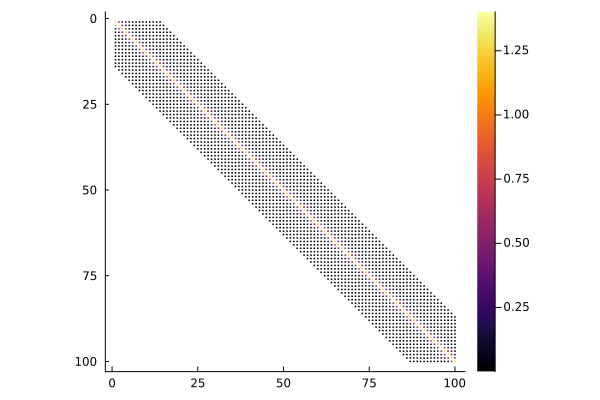

In [7]:
spy(aX[1:n,1:n])

## Ultraspherical orthogonal polynomials

Thus far, we've discussed properties of general orthogonal polynomials and illustrated them with Chebyshev polynomials.  Here we introduce the ultraspherical OPs and show how they can be used to represent linear differential operators as banded matrices and thus result in an efficient method for solving boundary value problems.

**Definition (Ultrapsherical OPs)** The ultraspherical OPs $\left\lbrace C_n^{(\lambda)} \right\rbrace$ are orthogonal on $[-1, 1]$ w.r.t. the weight function
$$
w(x) = (1-x^2)^{\lambda - {1\over 2}},
$$
where  $\lambda > 0$ and $C_n^{(\lambda)}(x) = k^{(\lambda)}_{n}x^n + \mathcal{O}(x^{n-1})$, where
$$
k_n^{(\lambda)} = {2^n (\lambda)_n \over n!} = {2^n \lambda (\lambda+1) (\lambda+2) \cdots (\lambda+n-1)  \over n!}
$$
and $(\lambda)_n$ is known as the (rising) Pochhammer symbol.

### Differentiation matrices

It turns out that the derivative of $T_n(x)$ is precisely a multiple of  $C^{(1)}_{n-1}(x)$, and similarly the derivative of $C_n^{(\lambda)}$ is a multiple of $C_{n-1}^{(\lambda+1)}$.

Let $\langle \cdot, \cdot \rangle_{\lambda}$ denote the following inner product,
$$
\langle f, g \rangle_{\lambda} = \int_{-1}^{1} f(x) g(x) (1-x^2)^{\lambda - \frac{1}{2}}\,{\rm d}x
$$
and note that Chebyshev polynomials are orthogonal w.r.t. $\langle \cdot, \cdot \rangle_{0}$ and the OP family $\{ C_n^{(\lambda)}\}$ are orthogonal w.r.t. $\langle \cdot, \cdot \rangle_{\lambda}$.

**Proposition (Chebyshev derivative)**
$$
T_n'(x) = n C^{(1)}_{n-1}(x)
$$

**Proof**
We first show that $T_n'(x)$ is orthogonal w.r.t. $\sqrt{1-x^2}$ to all  polynomials of degree $m < n-1$, denoted $f_m$, using integration by parts:
$$
\begin{eqnarray*}
\langle T_n',f_m\rangle_{1} &=& \int_{-1}^1 T_n'(x) f_m(x) \sqrt{1-x^2} {\rm d}x \\
&=& -\int_{-1}^1 T_n(x) (f_m'(x)(1-x^2) - xf_m(x)) {1  \over \sqrt{1-x^2}} {\rm d}x  \\ 
&=& - \langle T_n, f_m'(1-x^2) - x f_m \rangle_{0}  = 0
\end{eqnarray*}
$$
since $f_m'(1-x^2) - x f_m $ has degree $m-1 +2 = m+1 < n$.  Since $T_n'(x)$ and $C^{(1)}_{n-1}(x)$ have the same degree and are orthogonal with respect to the same weight, there exists a constant $K$ such that 
$$
T_n'(x) = KC^{(1)}_{n-1}(x) = K k_{n-1}^{(1)}x^{n-1} + \mathcal{O}(x^{n-2})= K 2^{n-1}x^{n-1} + \mathcal{O}(x^{n-2}).
$$
We have that $K = n$ since
$$
T_n'(x) = {{\rm d} \over {\rm d}x} (2^{n-1} x^n)  + O(x^{n-2}) = n 2^{n-1} x^{n-1} + O(x^{n-2}).
$$
$\blacksquare$

The exact same proof shows the following:

**Proposition (Ultraspherical derivative)**
$${{\rm d} \over {\rm d}x} C_n^{(\lambda)}(x) = 2 \lambda  C_{n-1}^{(\lambda+1)}(x)$$

As with the three-term recurrence and Jacobi matrices, it is useful to express this in matrix form. That is, for the derivatives of $T_n(x)$ we get
$$
{{\rm d} \over {\rm d}x}\left[T_0(x) | T_1(x) | \cdots \right] = \left[C_0^{(1)}(x) | C_1^{(1)}(x) | \cdots \right]\underbrace{\begin{bmatrix}
0 & 1 \cr
&& 2 \cr
&&& 3 \cr
&&&&\ddots
\end{bmatrix}}_{\mathcal{D}_0},
$$
hence for 
$$
f(x) = \left[T_0(x) | T_1(x) | \cdots \right] \underbrace{\begin{bmatrix} f_0\\f_1\\\vdots \end{bmatrix}}_{\mathbf{f}}
$$
we have a sparse differentiation matrix $\mathcal{D}_0$ in coefficient space with only one nonzero diagonal: 
$$
f'(x) = \left[C_0^{(1)}(x) | C_1^{(1)}(x) | \cdots \right]\mathcal{D}_0\mathbf{f}.
$$
Note that $\mathcal{D}_0$ maps Chebyshev coefficients of a function $f$ to the $C^{(1)}$ coefficients of $f'$ (i.e., the coefficients of $f'$ in the $C^{(1)}$ basis) and $\mathcal{D}_0$ has bandwidths $(-1, 1)$.

**Example** Here we see that applying a matrix to a vector of coefficients successfully calculates the derivative:

In [8]:
f = Fun(x -> cos(x^2), Chebyshev())   # f is expanded in Chebyshev coefficients
n = ncoefficients(f)   # This is the number of coefficients
# ∞-dimensional version of differentiation matrix
D0 = Derivative(Chebyshev())

ConcreteDerivative : Chebyshev() → Ultraspherical(1)
 ⋅  1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   ⋅
 ⋅   ⋅   2.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   ⋅
 ⋅   ⋅    ⋅   3.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   ⋅
 ⋅   ⋅    ⋅    ⋅   4.0   ⋅    ⋅    ⋅    ⋅    ⋅   ⋅
 ⋅   ⋅    ⋅    ⋅    ⋅   5.0   ⋅    ⋅    ⋅    ⋅   ⋅
 ⋅   ⋅    ⋅    ⋅    ⋅    ⋅   6.0   ⋅    ⋅    ⋅   ⋅
 ⋅   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   7.0   ⋅    ⋅   ⋅
 ⋅   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   8.0   ⋅   ⋅
 ⋅   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   9.0  ⋅
 ⋅   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   ⋱
 ⋅   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   ⋱

In [9]:
# finite section
D0[1:n-1,1:n]

31×32 BandedMatrix{Float64} with bandwidths (-1, 1):
  ⋅   1.0   ⋅    ⋅    ⋅    ⋅    ⋅   …    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
  ⋅    ⋅   2.0   ⋅    ⋅    ⋅    ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
  ⋅    ⋅    ⋅   3.0   ⋅    ⋅    ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
  ⋅    ⋅    ⋅    ⋅   4.0   ⋅    ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅   5.0   ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   6.0  …    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   …    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅        ⋅     ⋅     ⋅     

In [10]:
# Here is how we could create the differentiation matrix ourselves
BandedMatrix(1 => Vector(1.0:n-1))[1:n-1,1:n] == D0[1:n-1,1:n]

true

Here `D*f.coefficients` gives the vector of coefficients corresponding to the derivative, but now the coefficients are in the $\lbrace C_n^{(1)}(x)\rbrace$ basis, that is, `Ultraspherical(1)`:

In [11]:
fp = Fun(Ultraspherical(1), D0[1:n-1,1:n]*f.coefficients)
fp(0.1)

-0.001999966666833569

Let's check if it's correct:

In [12]:
f'(0.1)-fp(0.1),-2*0.1*sin(0.1^2)-fp(0.1)

(5.637851296924623e-18, 2.3548871186385156e-16)

Note that in ApproxFun.jl we can construct these operators rather nicely:

In [13]:
D = Derivative()
(D*f)(0.1) 

-0.001999966666833569

For $\lambda > 0$ have that
$$
{{\rm d} \over {\rm d}x}\left[C_0^{(\lambda)}(x) | C_1^{(\lambda)}(x) | \cdots \right] = \left[C_0^{(\lambda+1)}(x) | C_1^{(\lambda+1)}(x) | \cdots \right]\underbrace{2\lambda\begin{bmatrix}
0 & 1 \cr
&& 1 \cr
&&& 1 \cr
&&&&\ddots
\end{bmatrix}}_{\mathcal{D}_{\lambda}},
$$
which we can use to build higher order differentiation matrices: since
$$
{{\rm d} \over {\rm d}x}\left[T_0(x) | T_1(x) | \cdots \right] = \left[C_0^{(1)}(x) | C_1^{(1)}(x) | \cdots \right]\mathcal{D}_0,
$$
it follows that
$$
{{\rm d}^2 \over {\rm d}x^2}\left[T_0(x) | T_1(x) | \cdots \right] = \left[C_0^{(2)}(x) | C_1^{(2)}(x) | \cdots \right]\mathcal{D}_1\mathcal{D}_0,
$$
and thus
$$
{{\rm d}^n \over {\rm d}x^n}\left[T_0(x) | T_1(x) | \cdots \right] = \left[C_0^{(n)}(x) | C_1^{(n)}(x) | \cdots \right]\mathcal{D}_{n-1}\cdots\mathcal{D}_1\mathcal{D}_0,
$$

therefore, if
$$
f(x) = \left[T_0(x) | T_1(x) | \cdots \right]\begin{bmatrix}
f_0 \\
f_1 \\
\vdots
\end{bmatrix} = \left[T_0(x) | T_1(x) | \cdots \right]\mathbf{f}
$$
then
$$
{{\rm d}^n \over {\rm d}x^n}f(x) = \left[C_0^{(n)}(x) | C_1^{(n)}(x) | \cdots \right]\mathcal{D}_{n-1}\cdots\mathcal{D}_1\mathcal{D}_0\mathbf{f}
$$
i.e., the $n$-th order differentiation matrix is $\mathcal{D}_{n-1}\cdots\mathcal{D}_0$, it has bandwidths $(-n, n)$ and it maps the Chebyshev coefficients of a function $f$ to the coefficients of $f^{(n)}$ in the $C^{(n)}$ basis. For example, the second order differentiation matrix is
$$
\mathcal{D}_1\mathcal{D}_0 = 
\begin{bmatrix}
0 & 2 \cr
&& 2 \cr
&&& 2 \cr
&&&&\ddots
\end{bmatrix}\begin{bmatrix}
0 & 1 \cr
&& 2 \cr
&&& 3 \cr
&&&&\ddots
\end{bmatrix} = \begin{bmatrix}
0 & 0 & 4 \cr
&&& 6 \cr
&&& & 8 \cr
&&&& &\ddots
\end{bmatrix}
$$
Here is how we can construct these differentiation matrices in ApproxFun.jl:

In [14]:
D0 = Derivative(Chebyshev())
D1 = Derivative(Ultraspherical(1))
D1*D0

ConcreteDerivative : Chebyshev() → Ultraspherical(2)
 ⋅  ⋅  4.0   ⋅    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   ⋅
 ⋅  ⋅   ⋅   6.0   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   ⋅
 ⋅  ⋅   ⋅    ⋅   8.0    ⋅     ⋅     ⋅     ⋅     ⋅   ⋅
 ⋅  ⋅   ⋅    ⋅    ⋅   10.0    ⋅     ⋅     ⋅     ⋅   ⋅
 ⋅  ⋅   ⋅    ⋅    ⋅     ⋅   12.0    ⋅     ⋅     ⋅   ⋅
 ⋅  ⋅   ⋅    ⋅    ⋅     ⋅     ⋅   14.0    ⋅     ⋅   ⋅
 ⋅  ⋅   ⋅    ⋅    ⋅     ⋅     ⋅     ⋅   16.0    ⋅   ⋅
 ⋅  ⋅   ⋅    ⋅    ⋅     ⋅     ⋅     ⋅     ⋅   18.0  ⋅
 ⋅  ⋅   ⋅    ⋅    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   ⋱
 ⋅  ⋅   ⋅    ⋅    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   ⋱
 ⋅  ⋅   ⋅    ⋅    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   ⋱

In [15]:
Derivative(Chebyshev(),2) == D1*D0

true

### Conversion matrices

In the context of differential equations, we shall need to convert an expansion in one OP basis, e.g., the Chebyshev basis, to another basis, e.g., the $\{ C_n^{(1)}\}$ basis because each time we differentiate, we change basis, as we saw in the previous section.

**Proposition** There exists a conversion matrix $\mathcal{S}_0$ with bandwidths $(0,2)$ such that
$$
\left[ T_0(x) | T_1(x) | \cdots  \right] =  \left[ C^{(1)}_0(x) | C^{(1)}_1(x) | \cdots  \right]\mathcal{S}_0
$$

**Proof** At worst, $\mathcal{S}_0$ is upper triangular becase  $\{ C_n^{(1)}\}$ and $\{ T_n\}$ span the same space, i.e., since $T_n$ is a polynomial of degree $n$,
$$
T_n(x) = \sum_{k=0}^{n} c_k^{(n)} C_k^{(1)}(x),
$$
and note that $\left(\mathcal{S}_0\right)_{k,n} = c_k^{(n)}$. However, since
$$
c_k^{(n)} = \frac{\langle  T_n,  C^{(1)}_k \rangle_{1}}{\left\| C^{(1)}_k \right\|^2} = \frac{\langle  T_n,  (1-x^2)C^{(1)}_k \rangle_{0}}{\left\| C^{(1)}_k \right\|^2} = 0
$$
for $k \leq n-3$, the result follows.  $\blacksquare$

The conversion matrix $\mathcal{S}_0$ maps the Chebyshev coefficients of $f$ to expansion coefficients of $f$ in the $\{C_n^{(1)}\}$ basis (aka $C^{(1)}$ coefficients) because

$$
f(x) = \left[ T_0(x) | T_1(x) | \cdots  \right]
\begin{bmatrix}
f_0 \\
f_1 \\
\vdots
\end{bmatrix}  =  \left[ C^{(1)}_0(x) | C^{(1)}_1(x) | \cdots  \right]\mathcal{S}_0\begin{bmatrix}
f_0 \\
f_1 \\
\vdots
\end{bmatrix}
$$

Here is a finite section of $\mathcal{S}_0$:

In [16]:
n = 10
Conversion(Chebyshev(),Ultraspherical(1))[1:n,1:n]

10×10 BandedMatrix{Float64} with bandwidths (0, 2):
 1.0  0.0  -0.5    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
  ⋅   0.5   0.0  -0.5    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
  ⋅    ⋅    0.5   0.0  -0.5    ⋅     ⋅     ⋅     ⋅     ⋅ 
  ⋅    ⋅     ⋅    0.5   0.0  -0.5    ⋅     ⋅     ⋅     ⋅ 
  ⋅    ⋅     ⋅     ⋅    0.5   0.0  -0.5    ⋅     ⋅     ⋅ 
  ⋅    ⋅     ⋅     ⋅     ⋅    0.5   0.0  -0.5    ⋅     ⋅ 
  ⋅    ⋅     ⋅     ⋅     ⋅     ⋅    0.5   0.0  -0.5    ⋅ 
  ⋅    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    0.5   0.0  -0.5
  ⋅    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    0.5   0.0
  ⋅    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    0.5

To derive the entries of $\mathcal{S}_0$, we shall use the following result, whose proof is left as an exercise:

**Theorem ($C^{(1)}_n(x)$ are Chebyshev $U$ polynomials)** For $x = \cos \theta$, we have that
$$
C_n^{(1)}(x) = U_n(x) = \frac{\sin (n+1)\theta}{\sin\theta}
$$
where $\{ U_n \}$ are known as the Chebyshev polynomials of the second kind.

**Proposition (Chebyshev T-to-U conversion)**
$$
\begin{align*}
 T_0(x) &= U_0(x) \\
 T_1(x) &= {U_1(x) \over 2} \\
 T_n(x) &= {U_n(x) \over 2} - {U_{n-2}(x) \over 2}
\end{align*}
$$

**Proof** Setting $x =\cos \theta = (z + z^{-1})/2$ with $z = {\rm e}^{{\rm i} \theta}$, we have that $U_0(x) = 1$, $U_1(x) = 2\cos\theta = 2x$ and
$$
\begin{align*}
T_n(x) &= \cos n \theta = {z^{-n} + z^n \over 2}\\
U_n(x) &= {\sin (n+1) \theta \over \sin \theta} = {z^{n+1} - z^{-n-1} \over z - z^{-1}} = z^{-n} + z^{2-n} + \cdots +  \cdots + z^{n-2} + z^n
\end{align*}
$$
from which the result follows immediately.  $\blacksquare$

Using the fact that $C_n^{(1)}(x) = U_n(x)$, we note that we have derived the entries of $\mathcal{S}_0$.

**Corollary (Ultraspherical $\lambda$-to-($\lambda+1$) conversion)**
$$
C_n^{(\lambda)}(x) = {\lambda \over n+ \lambda} (C_n^{(\lambda+1)}(x) - C_{n-2}^{(\lambda+1)}(x))
$$

**Proof** This follows from differentiating the previous result. For example:
$$
\begin{align*}
 {{\rm d} \over {\rm d}x} T_0(x) &= {{\rm d} \over {\rm d}x} U_0(x) \\
 {{\rm d} \over {\rm d}x} T_1(x) &= {{\rm d} \over {\rm d}x} {U_1(x) \over 2} \\
{{\rm d} \over {\rm d}x} T_n(x) &= {{\rm d} \over {\rm d}x} \left({U_n(x) \over 2} - {U_{n-2} \over 2} \right)
\end{align*}
$$
becomes
$$
\begin{align*}
    0 &= 0\\
    U_0(x) &= C_0^{(2)}(x) \\
   n U_{n-1}(x) &= C_{n-1}^{(2)}(x)  - C_{n-3}^{(2)}(x)
\end{align*}
$$
Differentiating this repeatedly completes the proof. $\blacksquare$

From this result follows the entries of the conversion matrix $\mathcal{S}_{\lambda}$,
$$
\left[ C^{(\lambda)}_0(x) | C^{(\lambda)}_1(x) | \cdots  \right] = \left[ C^{(\lambda+1)}_0(x) | C^{(\lambda+1)}_1(x) | \cdots  \right]\mathcal{S}_{\lambda}
$$
and the fact that it has bandwidths $(0,2)$. Here's an example:

In [17]:
S1 = Conversion(Ultraspherical(1),Ultraspherical(2))

ConcreteConversion : Ultraspherical(1) → Ultraspherical(2)
 1.0  0.0  -0.3333333333333333    ⋅      ⋅   …    ⋅                    ⋅   ⋅
  ⋅   0.5   0.0                 -0.25    ⋅        ⋅                    ⋅   ⋅
  ⋅    ⋅    0.3333333333333333   0.0   -0.2       ⋅                    ⋅   ⋅
  ⋅    ⋅     ⋅                   0.25   0.0       ⋅                    ⋅   ⋅
  ⋅    ⋅     ⋅                    ⋅     0.2       ⋅                    ⋅   ⋅
  ⋅    ⋅     ⋅                    ⋅      ⋅   …    ⋅                    ⋅   ⋅
  ⋅    ⋅     ⋅                    ⋅      ⋅      -0.1111111111111111    ⋅   ⋅
  ⋅    ⋅     ⋅                    ⋅      ⋅       0.0                 -0.1  ⋅
  ⋅    ⋅     ⋅                    ⋅      ⋅       0.1111111111111111   0.0  ⋱
  ⋅    ⋅     ⋅                    ⋅      ⋅        ⋅                   0.1  ⋱
  ⋅    ⋅     ⋅                    ⋅      ⋅   …    ⋅                    ⋅   ⋱

In [18]:
bandwidths(S1)

(0, 2)

It also follows that 
$$
\begin{eqnarray*}
\left[ T_0(x) | T_1(x) | \cdots  \right] &=&  \left[ C^{(1)}_0(x) | C^{(1)}_1(x) | \cdots  \right]\mathcal{S}_0 \\
&=& \left[ C^{(2)}_0(x) | C^{(2)}_1(x) | \cdots  \right]\mathcal{S}_1\mathcal{S}_0 \\
&\vdots &  \\
& = & \left[ C^{(n)}_0(x) | C^{(n)}_1(x) | \cdots  \right]\mathcal{S}_{n-1}\cdots\mathcal{S}_1\mathcal{S}_0
\end{eqnarray*}
$$
therefore $\mathcal{S}_{n-1}\cdots\mathcal{S}_0$ maps the Chebyshev coefficients of a function $f$ to its $C^{(n)}$ coefficients.  It is left as an exercise to show that $\mathcal{S}_{n-1}\cdots\mathcal{S}_0$ has bandwidths $(0,2n)$.  Here's an example with $n = 2$:

In [19]:
S0 = Conversion(Chebyshev(),Ultraspherical(1))
S1*S0

ConversionWrapper : Chebyshev() → Ultraspherical(2)
 1.0  0.0   -0.6666666666666666    0.0    …    ⋅                     ⋅      ⋅
  ⋅   0.25   0.0                  -0.375       ⋅                     ⋅      ⋅
  ⋅    ⋅     0.16666666666666666   0.0         ⋅                     ⋅      ⋅
  ⋅    ⋅      ⋅                    0.125       ⋅                     ⋅      ⋅
  ⋅    ⋅      ⋅                     ⋅         0.07142857142857142    ⋅      ⋅
  ⋅    ⋅      ⋅                     ⋅     …   0.0                   0.0625  ⋅
  ⋅    ⋅      ⋅                     ⋅        -0.12698412698412698   0.0     ⋱
  ⋅    ⋅      ⋅                     ⋅         0.0                  -0.1125  ⋱
  ⋅    ⋅      ⋅                     ⋅         0.05555555555555555   0.0     ⋱
  ⋅    ⋅      ⋅                     ⋅          ⋅                    0.05    ⋱
  ⋅    ⋅      ⋅                     ⋅     …    ⋅                     ⋅      ⋱

In [20]:
S1*S0 == Conversion(Chebyshev(),Ultraspherical(2))

true

In [21]:
bandwidths(S1*S0)

(0, 4)

### Ultraspherical Three-term recurrence

**Theorem (three-term recurrence for Chebyshev U)**
$$
\begin{align*}
x U_0(x) &= {U_1(x) \over 2} \\
x U_n(x) &= {U_{n-1}(x) \over 2} + {U_{n+1}(x) \over 2}
\end{align*}
$$

**Proof**
Differentiating
$$
\begin{align*}
 x T_0(x) &= T_1(x) \\
x T_n(x)  &=  {T_{n-1}(x) \over 2} + {T_{n+1}(x) \over 2}
\end{align*}
$$
we get
$$
\begin{align*}
  T_0(x) &= U_0(x) \\
 T_n(x) + n x U_{n-1}(x)  &=  {(n-1) U_{n-2}(x) \over 2} + {(n+1) U_n(x) \over 2}
\end{align*}
$$
substituting in the conversion $T_n(x) = (U_n(x) - U_{n-2}(x))/2$ we get
$$
\begin{align*}
  T_0(x) &= U_0(x) \\
 n x U_{n-1}(x)  &=  {(n-1) U_{n-2}(x) \over 2} + {(n+1) U_n(x) \over 2} - (U_n(x) - U_{n-2}(x))/2 = {n U_{n-2}(x) \over 2} + {n U_n(x) \over 2}
\end{align*}
$$
$\blacksquare$

Differentiating this theorem again and applying the conversion formulae we get the following

**Corollary (three-term recurrence for ultraspherical)**
$$
\begin{align*}
x C_0^{(\lambda)}(x) &= {1 \over 2\lambda } C_1^{(\lambda)}(x) \\
 x C_n^{(\lambda)}(x) &=  {n+2\lambda-1 \over 2(n+\lambda)} C_{n-1}^{(\lambda)}(x) + {n+1 \over 2(n+\lambda)} C_{n+1}^{(\lambda)}(x)
\end{align*}
$$

These results give us the entries of the Jacobi matrices of the Ultraspherical OPs, i.e., matrices $X^{(\lambda)}$ such that
$$
x\left[ C^{(\lambda)}_0(x) | C^{(\lambda)}_1(x) | \cdots  \right] = \left[ C^{(\lambda)}_0(x) | C^{(\lambda)}_1(x) | \cdots  \right]X^{(\lambda)}
$$
For example, here's $X^{(\lambda)}$ for $\lambda = 2$:

In [22]:
Multiplication(Fun(), Ultraspherical(2))

ConcreteMultiplication : Ultraspherical(2) → Ultraspherical(2)
 0.0   0.6666666666666666   ⋅      ⋅   …   ⋅     ⋅                  ⋅
 0.25  0.0                 0.625   ⋅       ⋅     ⋅                  ⋅
  ⋅    0.3333333333333333  0.0    0.6      ⋅     ⋅                  ⋅
  ⋅     ⋅                  0.375  0.0      ⋅     ⋅                  ⋅
  ⋅     ⋅                   ⋅     0.4      ⋅     ⋅                  ⋅
  ⋅     ⋅                   ⋅      ⋅   …   ⋅     ⋅                  ⋅
  ⋅     ⋅                   ⋅      ⋅       ⋅     ⋅                  ⋅
  ⋅     ⋅                   ⋅      ⋅      0.55   ⋅                  ⋅
  ⋅     ⋅                   ⋅      ⋅      0.0   0.5454545454545454  ⋅
  ⋅     ⋅                   ⋅      ⋅      0.45  0.0                 ⋱
  ⋅     ⋅                   ⋅      ⋅   …   ⋅     ⋱                  ⋱

As we saw earlier in this chapter, if a function $f(x)$ has an expansion in the $C^{(\lambda)}$ basis,
$$
f(x) = \sum_{k=0}^{\infty}f_kC^{(\lambda)}_k(x) = \left[ C^{(\lambda)}_0(x) | C^{(\lambda)}_1(x) | \cdots  \right]\underbrace{\begin{bmatrix}
f_0 \\
f_1 \\
\vdots
\end{bmatrix}}_{\mathbf{f}},
$$
then the coefficients of $a(x)f(x)$ in the $C^{(\lambda)}$ basis, where $a(x)$ is a polynomial, are given by
$$
a(X^{(\lambda)})\mathbf{f}
$$
because
$$
a(x)\left[ C^{(\lambda)}_0(x) | C^{(\lambda)}_1(x) | \cdots  \right] = \left[ C^{(\lambda)}_0(x) | C^{(\lambda)}_1(x) | \cdots  \right]a(X^{(\lambda)}),
$$
i.e., $a(X^{(\lambda)})$ maps the $C^{(\lambda)}$ coefficients of $f$ to the $C^{(\lambda)}$ coefficients of $a(x)f$.  Also, if $a(x)$ has degree $d$, then $a(X^{(\lambda)})$ has bandwidths $(d, d)$.

Here's $a(X^{(1)})$ for $a(x) = 1 + x + x^2$:

In [23]:
Multiplication(Fun(x->1+x+x^2), Ultraspherical(1))

MultiplicationWrapper : Ultraspherical(1) → Ultraspherical(1)
 1.25  0.5   0.25   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    ⋅
 0.5   1.5   0.5   0.25   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    ⋅
 0.25  0.5   1.5   0.5   0.25   ⋅     ⋅     ⋅     ⋅     ⋅    ⋅
  ⋅    0.25  0.5   1.5   0.5   0.25   ⋅     ⋅     ⋅     ⋅    ⋅
  ⋅     ⋅    0.25  0.5   1.5   0.5   0.25   ⋅     ⋅     ⋅    ⋅
  ⋅     ⋅     ⋅    0.25  0.5   1.5   0.5   0.25   ⋅     ⋅    ⋅
  ⋅     ⋅     ⋅     ⋅    0.25  0.5   1.5   0.5   0.25   ⋅    ⋅
  ⋅     ⋅     ⋅     ⋅     ⋅    0.25  0.5   1.5   0.5   0.25  ⋅
  ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    0.25  0.5   1.5   0.5   ⋱
  ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    0.25  0.5   1.5   ⋱
  ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋱     ⋱    ⋱

## The ultraspherical spectral method

We can now combine the multiplication, differentiation and conversion matrices that we constructed to represent linear differential operators as banded matrices. We'll see that when we also impose boundary conditions, we obtain almost-banded linear systems that can be solved efficiently and whose solutions are the Chebyshev coefficients of the exact solution to the differential equation.

### First-order, constant coefficient equations
**Example 1:** Consider the simplest ODE:
$$
\begin{align*}
u(0) &= 1 \\
u'(x) - u(x) &= 0, \qquad x \in [-1, 1]
\end{align*}
$$
and suppose we represent $u(x)$ in its Chebyshev expansion, with coefficients to be determined. In other words, we want to calculate coefficients $u_k$ such that
$$
u(x) = \sum_{k=0}^\infty u_k T_k(x) = \left[ T_0(x) | T_1(x) | \cdots \right] \begin{bmatrix} u_0 \\ u_1 \\ \vdots \end{bmatrix}=  \left[ T_0(x) | T_1(x) | \cdots \right] \mathbf{u}
$$

The condition $u(0) = 1$ becomes
$$
u(0) = \left[ T_0(0) | T_1(0) | \cdots \right] \mathbf{u} = \begin{bmatrix}
1 & 0 & -1 & 0 & 1 & \cdots
\end{bmatrix}\mathbf{u} = 1,
$$
while
$$
u'(x) = \left[ C_0^{(1)}(x) | C_1^{(1)}(x) | \cdots \right]\mathcal{D}_0 \mathbf{u}.
$$
To express the differential equation $u' - u = 0$, we need to map the Chebyshev coefficients $\mathbf{u}$ to $C^{(1)}$ coefficients since $u'$ is expressed in the $C^{(1)}$ basis, hence we set
$$
u(x) = \left[ T_0(x) | T_1(x) | \cdots \right] \mathbf{u} =  \left[ C_0^{(1)}(x) | C_1^{(1)}(x) | \cdots \right]\mathcal{S}_0 \mathbf{u} 
$$
therefore, in the $C^{(1)}$  basis, the differential equation becomes
$$
\begin{eqnarray*}
u'(x)-u(x) &=&  \left[ C_0^{(1)}(x) | C_1^{(1)}(x) | \cdots \right]\left(\mathcal{D}_0 - \mathcal{S}_0\right)\mathbf{u}\\
 &=& \left[ C_0^{(1)}(x) | C_1^{(1)}(x) | \cdots \right]\underbrace{\begin{bmatrix} 0 \\ 0 \\ \vdots \end{bmatrix}}_{\mathbf{0}}.
\end{eqnarray*}
$$
Let $\mathcal{L} = \mathcal{D}_0 - \mathcal{S}_0$, then to compute the Chebyshev coefficients of the solution, we need to solve the system
$$
\begin{bmatrix}
T_0(0) & T_1(0) & \cdots  \\
 &\mathcal{L} &
\end{bmatrix}\mathbf{u} = \begin{bmatrix} 1 \\
\mathbf{0}
\end{bmatrix},
$$
i.e., we need to solve
$$
\begin{pmatrix}
      1 & 0 & -1 & 0 & 1 & \cdots \\
    -1 &1 & {1 \over 2} \cr
& -{1 \over 2} & 2 & {1 \over 2} \cr
&& -{1 \over 2} & 3 & {1 \over 2} \cr
&&&\ddots & \ddots & \ddots
\end{pmatrix} \begin{pmatrix} u_0\\u_1\\\vdots \end{pmatrix}  = \begin{pmatrix} 1 \\ 0 \\ 0 \\ \vdots \end{pmatrix}
$$
Note that this is an exact coefficient space representation of the differential equation subject to $u(0) = 1$.
The infinite matrix $\mathcal{L}$ has bandwidths $(0,2)$, hence apart from the top row, the matrix above is banded.  We call such matrices (banded apart from a finite number of dense rows), *almost-banded* matrices. The numerical solution of almost-banded systems is outside the scope of this module (though a simple approach is to truncate the infinite system to finite systems). We can however do this in ApproxFun:

In [24]:
B  = Evaluation(0.0) : Chebyshev()
D0  = Derivative() : Chebyshev() → Ultraspherical(1)
S0 = I : Chebyshev() → Ultraspherical(1)
L = D0 - S0
A = [B;
     L]

InterlaceOperator : Chebyshev() → 2-element ArraySpace:
Space{D, Float64} where D[ConstantSpace(Point(0.0)), Ultraspherical(1)]
  1.0   0.0  -1.0   0.0   1.0   0.0  -1.0   0.0   1.0  0.0  ⋯
 -1.0   1.0   0.5   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ⋱
  0.0  -0.5   2.0   0.5   0.0   0.0   0.0   0.0   0.0  0.0  ⋱
  0.0   0.0  -0.5   3.0   0.5   0.0   0.0   0.0   0.0  0.0  ⋱
  0.0   0.0   0.0  -0.5   4.0   0.5   0.0   0.0   0.0  0.0  ⋱
  0.0   0.0   0.0   0.0  -0.5   5.0   0.5   0.0   0.0  0.0  ⋱
  0.0   0.0   0.0   0.0   0.0  -0.5   6.0   0.5   0.0  0.0  ⋱
  0.0   0.0   0.0   0.0   0.0   0.0  -0.5   7.0   0.5  0.0  ⋱
  0.0   0.0   0.0   0.0   0.0   0.0   0.0  -0.5   8.0  0.5  ⋱
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  -0.5  9.0  ⋱
   ⋮     ⋱     ⋱     ⋱     ⋱     ⋱     ⋱     ⋱     ⋱    ⋱   ⋱

We can solve this system as follows:

ncoefficients(u) = 19
norm(u' - u) = 4.173347065336236e-16


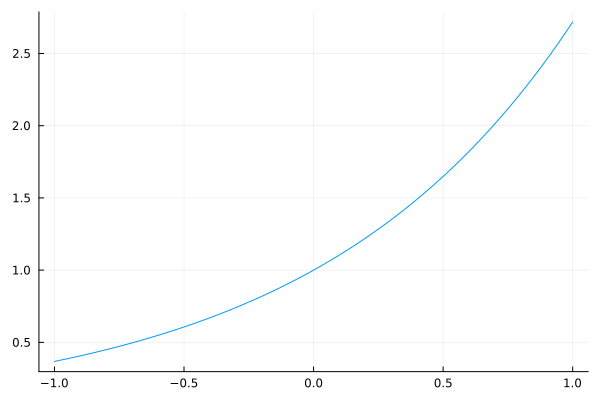

In [25]:
u = A \ [1; 0]
@show ncoefficients(u)
@show norm(u' - u)
plot(u;legend=false)

In the code above, the backslash command invokes some fancy numerical linear algebra: an adaptive QR algorithm that simultaneously solves the infinite linear system and determines the number of coefficients that have to be computed so that the relative error of the solution is on the order of machine epsilon.  Note that the solution to the linear system gives (approximate) Chebyshev coefficients of the solution.  In ApproxFun.jl, these coefficients are used to build a finite Chebyshev expansion of the solution:
$$
u(x) \approx \sum_{k = 0}^{n-1}u_kT_k(x)
$$
which we plotted above.

The approximate solution that was computed in ApproxFun matches the "true" result:

In [26]:
u(0.1) , exp(0.1)

(1.105170918075648, 1.1051709180756477)

Here are the (approximate) Chebyshev coefficients of the solution, which were determined by solving the almost-banded system shown above.

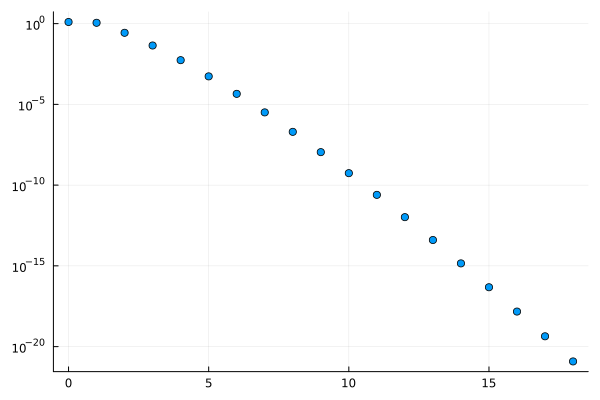

In [27]:
scatter(0:ncoefficients(u)-1,abs.(u.coefficients);yscale=:log10,legend=false)

Note we can incorporate right-hand sides as well, for example, to solve $u'(x) - u(x) = f(x)$ we need to express $f(x)$ in the $C^{(1)}$ basis.  Suppose we have the Chebyshev coefficients $f_k$ of $f(x)$, then
$$
f(x) = \left[ T_0(x) | T_1(x) | \cdots \right]\underbrace{\begin{bmatrix} f_0 \\
f_1 \\
 \vdots \end{bmatrix}}_{\mathbf{f}} =  \left[ C_0^{(1)}(x) | C_1^{(1)}(x) | \cdots \right]\mathcal{S}_0 \mathbf{f} 
$$
hence the differential equation is
$$
\begin{eqnarray*}
u'(x)-u(x) &=&  \left[ C_0^{(1)}(x) | C_1^{(1)}(x) | \cdots \right]\left(\mathcal{D}_0 - \mathcal{S}_0\right)\mathbf{u}\\
 &=& \left[ C_0^{(1)}(x) | C_1^{(1)}(x) | \cdots \right]\mathcal{S}_0\mathbf{f},
\end{eqnarray*}
$$
and the linear system to solved (if we again impose the condition $u(0) = 1$) is
$$
\begin{bmatrix}
T_0(0) & T_1(0) & \cdots  \\
 &\mathcal{L} &
\end{bmatrix}\mathbf{u} = \begin{bmatrix} 1 \\
\mathcal{S}_0\mathbf{f}
\end{bmatrix}.
$$
As with any good software package, ApproxFun.jl is designed in such a way that minimal input (and knowledge) is required of a user.  Hence, we can obtain a solution to the differential equation  in a few lines using a simple and intuitive syntax while the discretisation and solution of the problem is done automatically behind the scenes.  For example, here's the solution to the problem $u' - u = f(x)$ subject to $u(0) = 1$ on the interval $[-1, 1]$ with $f(x) = 200\sin(200x)$

ncoefficients(u) = 20
norm((u' - u) - f) = 4.6915830239812336e-14


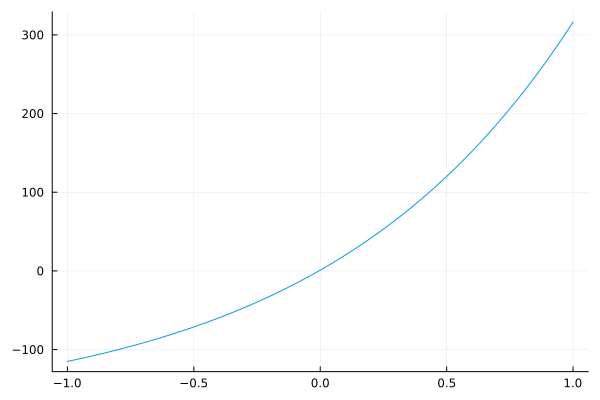

In [28]:
f = Fun(200*sin(200x))
B = Evaluation(0)
L = Derivative(Chebyshev()) - I
u = [B;L] \ [1; f]
@show ncoefficients(u)
@show norm(u'-u-f)
plot(u;legend=false)

### Second-order constant coefficient equations

**Example 2:**   Consider the boundary-value problem
$$
\begin{align*}
u(-1) &= 1\\
u(1) &= 0\\
u''(x) + u'(x)  + u(x) &= 0
\end{align*}
$$
Evaluation works as in the first-order case. To handle second-derivatives, we need $C^{(2)}$ polynomials:

As before, we set
$$
u(x) = \sum_{k=0}^\infty u_k T_k(x) = \left[ T_0(x) | T_1(x) | \cdots \right] \begin{bmatrix} u_0 \\ u_1 \\ \vdots \end{bmatrix}=  \left[ T_0(x) | T_1(x) | \cdots \right] \mathbf{u},
$$
and we represent the differential equation in the $C^{(2)}$ basis as follows:
$$
\begin{eqnarray*}
u''(x) + u'(x)  + u(x)  &=& \left[ C_0^{(2)}(x) | C_1^{(2)}(x) | \cdots \right]\left(\mathcal{D}_1\mathcal{D}_0  + \mathcal{S}_1\mathcal{D}_0 + \mathcal{S}_1\mathcal{S}_0  \right) \mathbf{u} \\
 &=& \left[ C_0^{(2)}(x) | C_1^{(2)}(x) | \cdots \right]\mathbf{0}.
 \end{eqnarray*}
$$
Since $T_n(-1) = (-1)^n$ and $T_n(1) = 1$ and setting $\mathcal{L} = \mathcal{D}_1\mathcal{D}_0  + \mathcal{S}_1\mathcal{D}_0 + \mathcal{S}_1\mathcal{S}_0$, the system we need solve to determine the Chebyshev coefficients of the solution is
$$
\begin{bmatrix}
1 & -1 &  1 & -1 & \cdots  \\
1 & 1  &  1 & 1  & \cdots \\
& &\mathcal{L} & &
\end{bmatrix}\mathbf{u} = \begin{bmatrix} 1  \\
0 \\
\mathbf{0}
\end{bmatrix},
$$
where $\mathcal{L}$ has bandwidths $(0,4)$. Note that $\mathcal{L}$ can also be expressed as $\mathcal{L} = \mathcal{D}_1\mathcal{D}_0  + \mathcal{D}_1\mathcal{S}_0 + \mathcal{S}_1\mathcal{S}_0$:

In [29]:
D0 = Derivative(Chebyshev())
S1 = Conversion(Ultraspherical(1),Ultraspherical(2))
S0 = Conversion(Chebyshev(),Ultraspherical(1))
D1 = Derivative(Ultraspherical(1))
S1*D0 - D1*S0

PlusOperator : Chebyshev() → Ultraspherical(2)
 ⋅  0.0  0.0  0.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   ⋅
 ⋅   ⋅   0.0  0.0  0.0   ⋅    ⋅    ⋅    ⋅    ⋅   ⋅
 ⋅   ⋅    ⋅   0.0  0.0  0.0   ⋅    ⋅    ⋅    ⋅   ⋅
 ⋅   ⋅    ⋅    ⋅   0.0  0.0  0.0   ⋅    ⋅    ⋅   ⋅
 ⋅   ⋅    ⋅    ⋅    ⋅   0.0  0.0  0.0   ⋅    ⋅   ⋅
 ⋅   ⋅    ⋅    ⋅    ⋅    ⋅   0.0  0.0  0.0   ⋅   ⋅
 ⋅   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   0.0  0.0  0.0  ⋅
 ⋅   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   0.0  0.0  ⋱
 ⋅   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   0.0  ⋱
 ⋅   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   ⋱
 ⋅   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   ⋱

Putting everything together, we get:

ncoefficients(u) = 19
norm((u')' + u' + u) = 1.2461757862789095e-16


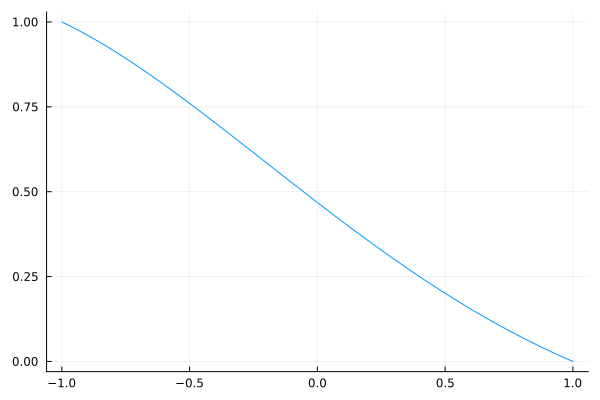

In [30]:
B₋₁ = Evaluation(-1) : Chebyshev()
B₁ = Evaluation(1) : Chebyshev()
# u(-1)
# u(1)
# u'' + u' +u
L = D1*D0 + S1*D0 + S1*S0

A = [B₋₁;
     B₁;
     L]

u = A \ [1.0,0.0,0.0]
@show ncoefficients(u)
@show norm(u''+u'+u)
plot(u;legend=false)

Here's a shorter (and more elegant) syntax for solving the same problem:

In [31]:
D = Derivative(Chebyshev())
B = Dirichlet()
L = D^2 + D + I
u2 = [B;L]\[[1,0],0]
norm(u2 - u)

4.3027919876054977e-19

### Variable coefficients

**Example 3:** Consider the Airy ODE
$$
\begin{align*}
u(-1) &= 1\\
u(1) &= 0\\
u''(x) - xu(x) &= 0
\end{align*}
$$
to handle this, we need only use the Jacobi matrix to represent multiplication by $x$:

$$
\begin{eqnarray*}
u''(x) - xu(x)  &=& \left[ C_0^{(2)}(x) | C_1^{(2)}(x) | \cdots \right]\left(\mathcal{D}_1\mathcal{D}_0  - \mathcal{S}_1\mathcal{S}_0X^{(0)}   \right) \mathbf{u} \\
 &=& \left[ C_0^{(2)}(x) | C_1^{(2)}(x) | \cdots \right]\mathbf{0}.
 \end{eqnarray*}
$$
where $X^{(0)}$ is the Jacobi matrix of the Chebyshev $T$ polynomials. The infinite matrix $\mathcal{S}_1\mathcal{S}_0X^{(0)}$ can also be expressed as $\mathcal{S}_1X^{(1)}\mathcal{S}_0$ or $X^{(2)}\mathcal{S}_1\mathcal{S}_0$, where $X^{(1)}$ and $X^{(2)}$ represent the Jacobi matrices of the $C^{(1)}$ and $C^{(2)}$ polynomials, respectively. 

In [32]:
X0 = Multiplication(Fun(),Chebyshev())  
# Fun() constructs the identity function, i.e., it is the same as Fun(x - > x)
X1 = Multiplication(Fun(),Ultraspherical(1))
X2 = Multiplication(Fun(),Ultraspherical(2))
S1*(S0*X0) - S1*(X1*S0)
S1*(S0*X0) - X2*(S1*S0)

PlusOperator : Chebyshev() → Ultraspherical(2)
 0.0  2.7755575615628914e-17  0.0  0.0  …    ⋅                     ⋅
 0.0  0.0                     0.0  0.0       ⋅                     ⋅
  ⋅   0.0                     0.0  0.0       ⋅                     ⋅
  ⋅    ⋅                      0.0  0.0       ⋅                     ⋅
  ⋅    ⋅                       ⋅   0.0      0.0                    ⋅
  ⋅    ⋅                       ⋅    ⋅   …   0.0                    ⋱
  ⋅    ⋅                       ⋅    ⋅       0.0                    ⋱
  ⋅    ⋅                       ⋅    ⋅       0.0                    ⋱
  ⋅    ⋅                       ⋅    ⋅      -3.469446951953614e-18  ⋱
  ⋅    ⋅                       ⋅    ⋅       0.0                    ⋱
  ⋅    ⋅                       ⋅    ⋅   …    ⋱                     ⋱

The linear system to be solved for the coefficients is therefore
$$
\begin{bmatrix}
1 & -1 &  1 & -1 & \cdots  \\
1 & 1  &  1 & 1  & \cdots \\
& &\mathcal{L} & &
\end{bmatrix}\mathbf{u} = \begin{bmatrix} 1  \\
0 \\
\mathbf{0}
\end{bmatrix},
$$
where $\mathcal{L} = \mathcal{D}_1\mathcal{D}_0  - \mathcal{S}_1\mathcal{S}_0X^{(0)} $ has bandwidths $(1,5)$.

bandwidths(L) = (1, 5)
ncoefficients(u) = 22
norm((u')' - Fun(x) * u) = 0.6149018416325154


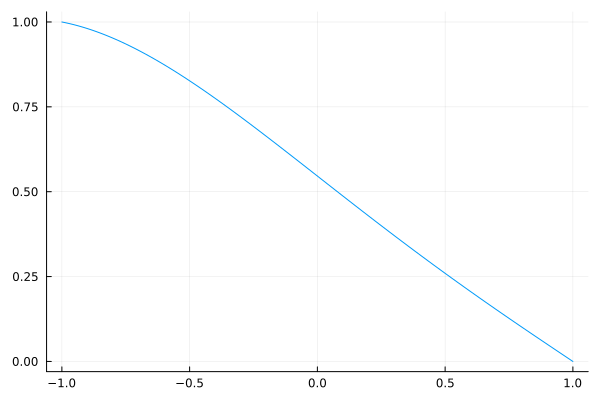

In [33]:
L = D1*D0 - S1*S0*X0

@show bandwidths(L)

A = [B₋₁;   # u(-1)
     B₁ ;   # u(1)
     L]   # u'' - x*u

u = A \ [1.0;0.0;0.0]
@show ncoefficients(u)
@show norm(u'' - Fun(x)*u )
plot(u; legend=false)

Here's a shorter syntax:

In [34]:
x = Fun()
D = Derivative()
B = Dirichlet()
L = D^2 - x
u2 = [B;L] \ [[1.0,0.0],0.0]
norm(u-u2)

9.240062508654186e-17

If we introduce a small parameter, that is, solve the singularly perturbed problem
$$
\begin{align*}
u(-1) &= 1\\
u(1) &= 0\\
\epsilon u''(x) - xu(x) &= 0
\end{align*}
$$
we can see it's pretty hard to compute solutions:

ncoefficients(u) = 740
norm(ε * (u')' - x * u) = 5.613771527522326e-12


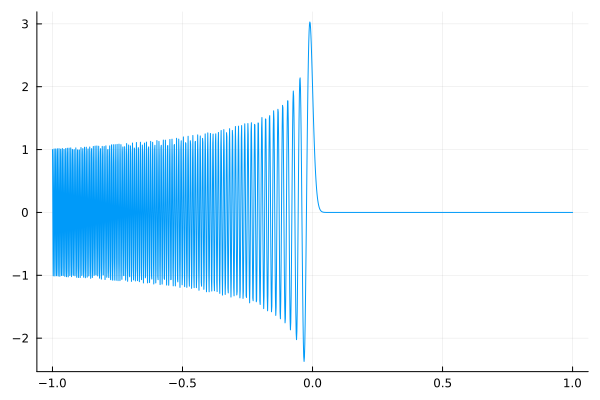

In [35]:
ε = 1E-6
L = ε*D^2 - x
u = [B;L] \ [[1.0,0.0],0.0]
@show ncoefficients(u)
@show norm(ε*u''-x*u)
plot(u; legend=false)

Because of the banded structure, this can be solved fast:

In [36]:
ε = 1E-10
L = ε*D^2 - x
u = @time [B;L] \ [[1.0,0.0],0.0]
@show ncoefficients(u)
@show norm(ε*u''-x*u);

  0.764932 seconds (12.66 M allocations: 285.405 MiB, 10.61% gc time)
ncoefficients(u) = 62496
norm(ε * (u')' - x * u) = 3.911433249102875e-8


**Example 4:** Now consider a second order (and singularly perturbed) boundary-value problem with a polynomial coefficient $a(x)$, e.g.
$$
\begin{align*}
u(-1) &= 1\\
u(1) &= 0\\
\epsilon u''(x) - a(x)u(x) &= 0.
\end{align*}
$$
In the $C^{(2)}$ basis, the differential equation becomes
$$
\begin{eqnarray*}
\epsilon u''(x) - a(x)u(x)  &=& \left[ C_0^{(2)}(x) | C_1^{(2)}(x) | \cdots \right]\left(\epsilon\mathcal{D}_1\mathcal{D}_0  - \mathcal{S}_1\mathcal{S}_0a(X^{(0)})  \right) \mathbf{u} \\
 &=& \left[ C_0^{(2)}(x) | C_1^{(2)}(x) | \cdots \right]\mathbf{0}.
 \end{eqnarray*}
$$
where $X^{(0)}$ is the Jacobi matrix of the Chebyshev $T$ polynomials. The infinite matrix $\mathcal{S}_1\mathcal{S}_0a(X^{(0)})$ can also be expressed as $\mathcal{S}_1a(X^{(1)})\mathcal{S}_0$ or $a(X^{(2)})\mathcal{S}_1\mathcal{S}_0$, where $X^{(1)}$ and $X^{(2)}$ represent the Jacobi matrices of the $C^{(1)}$ and $C^{(2)}$ polynomials, respectively.  Here's an example with $a(x) = -1 + x + x^2$:

bandwidths(L) = (2, 6)
ncoefficients(u) = 1182
norm(ε * (u')' - a * u) = 1.050061138807772e-11


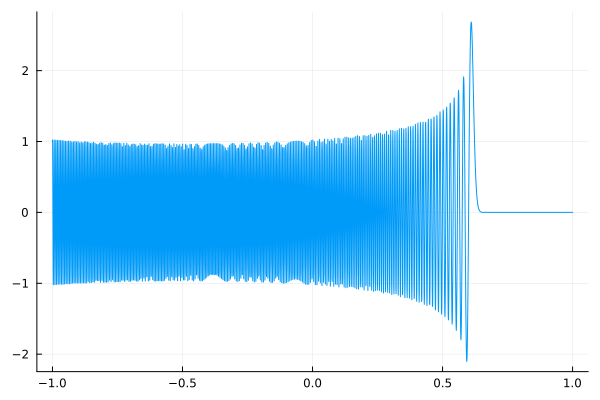

In [37]:
ε = 1E-6
aX = -I + X0 + X0^2
L = ε*D1*D0 - S1*S0*aX

@show bandwidths(L)

A = [B₋₁;   # u(-1)
     B₁ ;   # u(1)
     L]   

u = A \ [1.0;0.0;0.0]
@show ncoefficients(u)
a = Fun(x -> -1+x+x^2)
@show norm(ε*u'' - a*u )
plot(u; legend=false)

Here's the shorter syntax:

In [38]:
L = ε*D^2 - a
u2 = [B;L] \ [[1.0,0.0],0.0]
norm(u-u2)

7.023301415344089e-14

Now consider a similar singularly perturbed boundary-value problem, but with a variable coefficient that is not a polynomial:
$$
\begin{align*}
u(-1) &= 1\\
u(1) &= 0\\
\epsilon u''(x) + {\rm e}^xu(x) &= 0.
\end{align*}
$$
In this case we replace  ${\rm e}^{x}$ with a polynomial approximation in the Chebyshev basis:
$$
{\rm e}^{x} \approx a(x) = \sum_{k = 0}^{m-1} a_kT_k(x)
$$
and represent the differential equation in the $C^{(2)}$ basis  as before:
$$
\begin{eqnarray*}
\epsilon u''(x) - {\rm e}^{x}u(x)  &\approx & \left[ C_0^{(2)}(x) | C_1^{(2)}(x) | \cdots \right]\left(\epsilon\mathcal{D}_1\mathcal{D}_0  - \mathcal{S}_1\mathcal{S}_0a(X^{(0)})  \right) \mathbf{u} \\
 &=& \left[ C_0^{(2)}(x) | C_1^{(2)}(x) | \cdots \right]\mathbf{0}.
 \end{eqnarray*}
$$
In ApproxFun.jl, the polynomial degree $m$ such that the polynomial approximation is accurate to machine epsilon on $[-1, 1]$ is determined automatically and $a(X^{(0)})$ is computed using Clenshaw's algorithm.

bandwidths(L) = (13, 17)
ncoefficients(u) = 1234
norm(ε * (u')' + a * u) = 2.752339672427475e-12


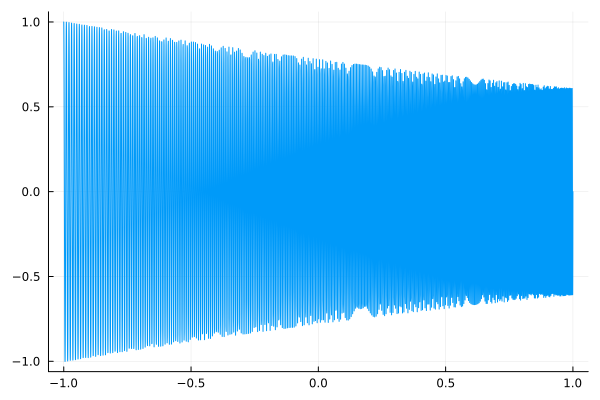

In [39]:
ε = 1E-6
a = Fun(exp, Chebyshev()) # polynomial approximation to exp(x)
aX = Multiplication(a) : Chebyshev() # constructed using Clenshaw:
L = ε*D1*D0 + S1*S0*aX

@show bandwidths(L)

A = [B₋₁;   # u(-1)
     B₁ ;   # u(1)
     L] 

u = A \ [1.0;0.0;0.0]
@show ncoefficients(u)
@show norm(ε*u'' + a*u )
plot(u; legend=false)

In [40]:
L = ε*D^2 + a
u2 = [B;L] \ [[1.0,0.0],0.0]
norm(u-u2)

6.928889909062075e-14

Here we see the almost banded structure of the coefficient space discretisation of the boundary-value problem:

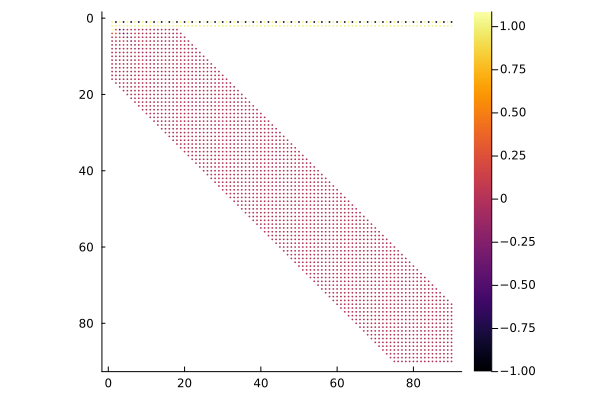

In [41]:
spy(Matrix(A[1:90,1:90]))

### General linear equations

In general, we can represent a $k$-th order linear differential equation with polynomial coefficients $a_{\ell}(x)$, $\ell = 0, \ldots, k$, 
$$
a_k(x)\frac{{\rm d}^k}{{\rm d}x^k}u(x) + \cdots + a_1(x)\frac{{\rm d}}{{\rm d}x}u(x) + a_0(x)u(x) = f(x)
$$
using banded matrices: in the $C^{(k)}$ basis, the differential equation becomes
$$
\left[ C_0^{(k)} | C_1^{(k)}(x) | \cdots    \right]\mathcal{L}\mathbf{u} = \left[ C_0^{(k)} | C_1^{(k)}(x) | \cdots    \right]\mathcal{S}_{k-1}\cdots\mathcal{S}_0\mathbf{f}
$$
where $\mathbf{u}$ and $\mathbf{f}$ are the (unknown and known, respectively) Chebyshev coefficients of $u$ and $f$ and 
$$
\mathcal{L} = a_k(X^{(k)})\mathcal{D}_{k-1}\cdots\mathcal{D}_0 + \mathcal{S}_{k-1}a_{k-1}(X^{(k-1)})\mathcal{D}_{k-2}\cdots\mathcal{D}_0 + \cdots + \mathcal{S}_{k-1}\cdots\mathcal{S}_{0}a_{0}(X^{(0)}),
$$
where $X^{(\ell)}$ is the Jacobi matrix of the $C^{(\ell)}$ polynomials, $\ell = 1, \ldots, k$ and  $X^{(0)}$ is the Jacobi matrix of the Chebyshev polynomials.  If 
$$
m = \max \{ \deg a_{\ell}(x) \: : \: \ell = 0, \ldots, k\},
$$
then $\mathcal{L}$ will have bandwidths $(\lambda, \mu)$ with $\lambda, \mu = \mathcal{O}(m)$. 

Let $\mathcal{B} \in \mathbb{R}^{k\times \infty}$ and $\mathbf{c} \in \mathbb{R}^{k}$ be such that 
$$
\mathcal{B}\mathbf{u} = \mathbf{c},
$$
which represents $k$ boundary and / or other conditions on the solution.  For example, for second order boundary value problems with Dirichlet boundary conditions $u(-1) = a$, $u(1)= b$, we have that 
$$
\mathcal{B} = 
\begin{bmatrix}
1 & -1 & 1 & -1 & \cdots  \\
1 &  1  & 1 & 1 & \cdots
\end{bmatrix} \qquad
\mathbf{c} = 
\begin{bmatrix} a \\
b 
\end{bmatrix}.
$$
then the almost-banded coefficient space representation of the differential equation and boundary / other conditions is
$$
\begin{bmatrix}
\mathcal{B} \\
\mathcal{L} 
\end{bmatrix}\mathbf{u} = 
\begin{bmatrix}
\mathbf{c} \\
\mathcal{S}_{k-1}\cdots\mathcal{S}_0\mathbf{f}
\end{bmatrix}
$$
which can be solved efficiently using an adaptive QR method (in $\mathcal{O}(m^2n)$ operations, where $n$ is the number of Chebyshev coefficients of the solution).  

**Remark:** Time permitting, we'll see how the ultraspherical spectral method can be extended to PDE problems.

**Remark:** Here we only discussed Chebyshev and ultraspherical OPs.  They are examples of *classical orthogonal polynomials*, which have the property that their derivatives are also OPs (but with respect to different weight functions).  As we learned in this chapter, this turned out to be crucial for designing an efficient method for solving linear differential equations. Here are the classical OPs:


| Name        |  $(a,b)$ |  $w(x)$      | Notation   |  $k_n$ |
|:-------------|:------------- |:----------------------|:-----|:-----|
| Hermite     |$(-\infty,\infty)$ | ${\rm e}^{-x^2}$             | $H_n(x)$ | $2^n$ |
| Laguerre    | $(0,\infty)$ | $x^\alpha {\rm e}^{-x}$      |   $L_n^{(\alpha)}(x)$ | [Table 18.3.1](http://dlmf.nist.gov/18.3) |
| Jacobi      | $(-1,1)$ | $(1-x)^{\alpha} (1+x)^\beta$      |    $P_n^{(\alpha,\beta)}(x)$ | [Table 18.3.1](http://dlmf.nist.gov/18.3) |

There are OPs on $[-1, 1]$ that are related to Jacobi OPs by constant multiples that have their own names, some of which we studied in this chapter:

| Name        | Jacobi parameters  |  $w(x)$      | Notation   |  $k_n$ |
|:-------------|:------------- |:----------------------|:-----|:------|
| Jacobi      | $\alpha,\beta$ | $(1-x)^{\alpha} (1+x)^\beta$      |    $P_n^{(\alpha,\beta)}(x)$ | [Table 18.3.1](http://dlmf.nist.gov/18.3) |
| Legendre      | $0,0$ | $1$      |    $P_n(x)$ | $2^n(1/2)_n/n!$ |
| Chebyshev (1st)      | $-{1 \over 2},-{1 \over 2}$ | $1 \over \sqrt{1-x^2}$ | $T_n(x)$ | $1 (n=0), 2^{n-1} (n \neq 0)$ |
| Chebyshev (2nd)      | ${1 \over 2},{1 \over 2}$ | $\sqrt{1-x^2}$      |    $U_n(x)$ | $2^n$
| Ultraspherical      | $\lambda-{1 \over 2},\lambda-{1 \over 2}$ | $(1-x^2)^{\lambda - 1/2}, \lambda \neq 0$      |    $C_n^{(\lambda)}(x)$ | $2^n(\lambda)_n/n!$ |

*Semiclassical OPs* of one variable and *multivariate OPs* (which, time permitting, we'll discuss later in this module) are useful for spectral methods for PDEs.